## LAMMPS Integration 

In [1]:
import openpathsampling as paths
import openpathsampling.engines.lammps as eng

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

We will run a test file

In [3]:
infile = '/usr/local/share/lammps/examples/python-examples/in.simple'

Load all lines contained in _Lammps_ script

In [13]:
script = open(infile,'r').read()

Output the script. In our case a simple 256 atom LJ liquid.

In [24]:
print script

# 3d Lennard-Jones melt

units		lj
atom_style	atomic
atom_modify	map array

lattice		fcc 0.8442
region		box block 0 4 0 4 0 4
create_box	1 box
create_atoms	1 box
mass		1 1.0

velocity	all create 1.44 87287 loop geom

pair_style	lj/cut 2.5
pair_coeff	1 1 1.0 1.0 2.5

neighbor	0.3 bin
neigh_modify	delay 0 every 20 check no

fix		1 all nve

variable        fx atom fx

run		10



Create the engine as usual

In [18]:
engine = eng.Engine(
    inputs=script,
    options={
        'n_steps_per_frame': 100,
        'n_frames_max': 5000
    }
)

An then just run it, as you are used to

In [19]:
traj = engine.generate(engine.current_snapshot, [paths.LengthEnsemble(1000).can_append])

Some simple plotting

In [20]:
import pandas as pd

Plot the time development of the potential energy of a trajectory

In [21]:
traj

Trajectory[1000]

In [22]:
df = pd.DataFrame([sn.coordinates[0][1]._value for sn in traj])

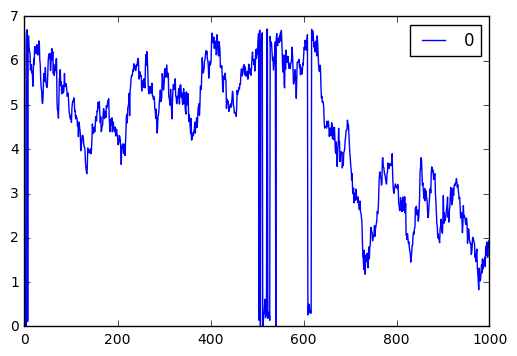

In [23]:
df.plot()

That's it. Go from there... Whohoo...